# Classification - Nearest Neighbors

## Student Details 

First Student Name and ID: MOHAMMAD FIROZ RANGWALA 1001872492

## -------------SOLUTION----------------

In [194]:
# Importing related Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv

# Importing SKLearn clssifiers and libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import mglearn

In [195]:
data_titanic=pd.read_csv('titanic.csv') # read csv
data_titanic.head(5)  # print 5 values

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
data_titanic.info() # data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [197]:
#### CLEAN THE DATA (PREPROCESSING)
#### We donot need attributes like Name, Ticket, Fare and Cabin as they provide no logical relation for survival
data_titanic = data_titanic.drop('Name', axis=1,)
data_titanic = data_titanic.drop('Ticket', axis=1,)
data_titanic = data_titanic.drop('Fare', axis=1,)
data_titanic = data_titanic.drop('Cabin', axis=1,)

#### Create new attribute family to reduce overall attributes, by adding sibsp, parch, and 1 (passenger).
data_titanic['Family'] = data_titanic['SibSp'] + data_titanic['Parch'] + 1
#### Create new attribute family to reduce overall attributes, by adding sibsp, parch, and 1 (passenger).
data_titanic = data_titanic.drop('SibSp', axis=1,)
data_titanic = data_titanic.drop('Parch', axis=1,)

In [198]:
### Find null values in attributes and fill with values
attr_list = list(data_titanic.columns.values)

for item in attr_list:
    print (item,": ",sum(pd.isnull(data_titanic[item])))

Survived :  0
Pclass :  0
Sex :  0
Age :  177
Embarked :  2
Family :  0


In [199]:
### Replace null values in age with median age and embarked with mode (max freq) of the values
data_titanic["Age"] = data_titanic["Age"].fillna(data_titanic["Age"].median())
# data_titanic["Embarked"].mode()
data_titanic["Embarked"] = data_titanic["Embarked"].fillna("S")

In [200]:
## clean data
data_titanic.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


In [201]:
## Finding 3 best attributes
filterX = data_titanic.filter(['Pclass','Sex','Age','Embarked','Family'], axis=1)
filterY = data_titanic['Survived']
filterX["Embarked"][data_titanic["Embarked"] == "S"] = 1
filterX["Embarked"][data_titanic["Embarked"] == "C"] = 2
filterX["Embarked"][data_titanic["Embarked"] == "Q"] = 3
filterX["Sex"][data_titanic["Sex"] == "male"] = 1
filterX["Sex"][data_titanic["Sex"] == "female"] = 2
# filterX.head()
## Finding best attributes by using selectKbest
bestfeatures = SelectKBest(score_func=chi2, k=len(filterX.columns))
fit = bestfeatures.fit(filterX, filterY)
ship_scores = pd.DataFrame(fit.scores_)
ship_columns = pd.DataFrame(filterX.columns)
ship_feature_scores = pd.concat([ship_columns,ship_scores],axis=1)
ship_feature_scores.columns = ['Attribute','Score']  #naming the dataframe columns
ship_feature_scores.sort_values(by="Score", ascending=False)


<ipython-input-201-d72aaaa3f10d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterX["Embarked"][data_titanic["Embarked"] == "S"] = 1
<ipython-input-201-d72aaaa3f10d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterX["Embarked"][data_titanic["Embarked"] == "C"] = 2
<ipython-input-201-d72aaaa3f10d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterX["Embarked"][data_titanic["Embarked"] == "Q"] = 3
<ipython-input-201-d72

,Attribute,Score
1,Sex,44.389470
0,Pclass,30.873699
2,Age,21.649163
3,Embarked,3.013771
4,Family,0.336787


<ipython-input-202-52318fc9b75f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filter["Sex"][data_titanic["Sex"] == "male"] = 1
<ipython-input-202-52318fc9b75f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filter["Sex"][data_titanic["Sex"] == "female"] = 2


Text(0, 0.5, 'Error Rate')

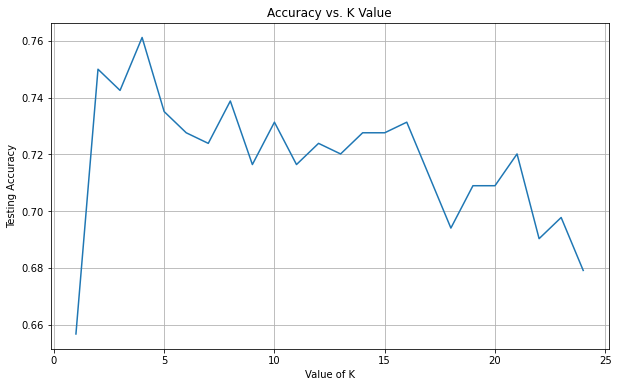

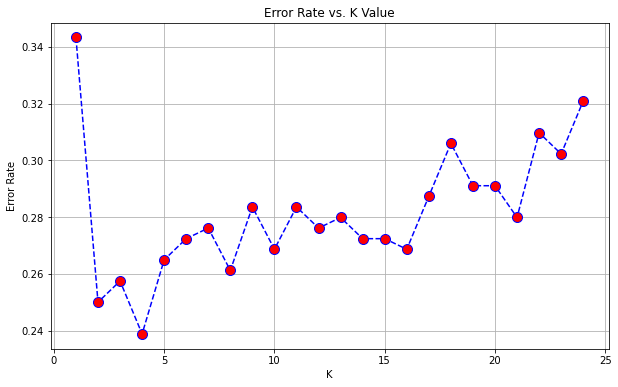

In [202]:
## Finding KNN

## Finding best k

X_filter = data_titanic.filter(['Pclass','Sex','Age'], axis=1)
y = data_titanic['Survived'].values
X_filter["Sex"][data_titanic["Sex"] == "male"] = 1
X_filter["Sex"][data_titanic["Sex"] == "female"] = 2
X = X_filter.values

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
k_range = range(1,25)
scores = []
data = []
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    error_rate.append(np.mean(y_pred != y_test))
    data.append({
        'k-value': k,
        'accuracy': metrics.accuracy_score(y_test, y_pred),
        'confusion': confusion_matrix(y_test,y_pred),
        'classification': classification_report(y_test, y_pred)
    })
# print(scores)  
plt.figure(figsize=(10,6))
plt.title('Accuracy vs. K Value')
plt.plot(k_range, scores)
plt.grid(True)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Error Rate')

Top 3 K values:

K value: 4
Accuracy: 0.7611940298507462
Confusion Matrix:
 [[160  12]
 [ 52  44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       172
           1       0.79      0.46      0.58        96

    accuracy                           0.76       268
   macro avg       0.77      0.69      0.71       268
weighted avg       0.77      0.76      0.74       268



<ipython-input-203-2213e06c4f9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Sex"][data_titanic["Sex"] == "male"] = 1
<ipython-input-203-2213e06c4f9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Sex"][data_titanic["Sex"] == "female"] = 2
<ipython-input-203-2213e06c4f9f>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcol

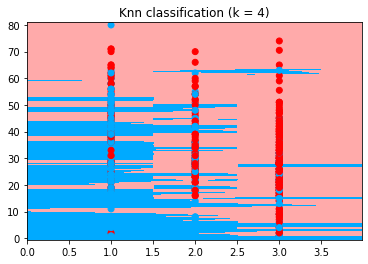



K value: 2
Accuracy: 0.75
Confusion Matrix:
 [[153  19]
 [ 48  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       172
           1       0.72      0.50      0.59        96

    accuracy                           0.75       268
   macro avg       0.74      0.69      0.70       268
weighted avg       0.75      0.75      0.74       268



<ipython-input-203-2213e06c4f9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Sex"][data_titanic["Sex"] == "male"] = 1
<ipython-input-203-2213e06c4f9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Sex"][data_titanic["Sex"] == "female"] = 2
<ipython-input-203-2213e06c4f9f>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcol

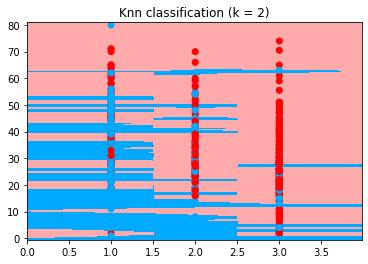



K value: 3
Accuracy: 0.7425373134328358
Confusion Matrix:
 [[141  31]
 [ 38  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       172
           1       0.65      0.60      0.63        96

    accuracy                           0.74       268
   macro avg       0.72      0.71      0.72       268
weighted avg       0.74      0.74      0.74       268



<ipython-input-203-2213e06c4f9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Sex"][data_titanic["Sex"] == "male"] = 1
<ipython-input-203-2213e06c4f9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["Sex"][data_titanic["Sex"] == "female"] = 2
<ipython-input-203-2213e06c4f9f>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcol

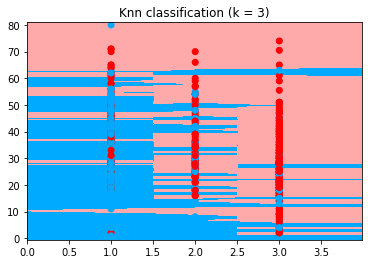

In [203]:
# Accuracy, confusion matrix, classification report and 2d plot of top 3 values

def knn_plot(k):
    titanic = data_titanic.filter(['Pclass','Sex','Age'], axis=1)
    y_main = data_titanic['Survived'].values
    titanic["Sex"][data_titanic["Sex"] == "male"] = 1
    titanic["Sex"][data_titanic["Sex"] == "female"] = 2
    columns_to_iterate = ['Pclass','Sex','Age']
    for column in columns_to_iterate:
        mean_value = titanic[column].mean(skipna=True)
        titanic = titanic.replace({column: {0: mean_value}})
        titanic[column] = titanic[column].astype(np.float64)
    X_main = titanic.drop(columns=['Sex']) 
#     print(X_main.values[:,:2])
    X_train, X_test, y_train, y_test = train_test_split(X_main, y_main, test_size=0.2,
                                                                        random_state=1, stratify=y_main)
    n_neighbors = k

    X = X_main.values[:, :2]
    y = y_main
    h = .02

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, metric='euclidean')
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Knn classification (k = %i)" % (n_neighbors))
    plt.show()
    

kData = sorted(data, key=lambda k: k['accuracy'], reverse=True) 
printKlist = kData[:3]
print('Top 3 K values:\n')
for item in printKlist:
    print("K value:",item['k-value'])
    print("Accuracy:",item['accuracy'])
    print("Confusion Matrix:\n",item['confusion'])
    print("Classification Report:\n",item['classification'])
    knn_plot(item['k-value'])
    print('\n')